<a href="https://colab.research.google.com/github/szyxxx/MachineLearning-TelkomUniversity/blob/main/Clustering/SKLEARN/AXELDAVID_1103210017_TK4504_SKLEARN_CLUSTERING_MALL_CUSTOMERS_OPTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Axel David<br>
1103210017<br>
SKLearn Clustering<br>


# Import Library

In [14]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import pandas as pd
import time
from google.colab import drive
import zipfile

# Import Dataset

In [15]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
! chmod 600 /content/drive/MyDrive/ColabNotebooks/kaggle_conf/kaggle.json

In [17]:
! KAGGLE_CONFIG_DIR=/content/drive/MyDrive/ColabNotebooks/kaggle_conf/ kaggle datasets download -d shwetabh123/mall-customers

mall-customers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
zip_file = zipfile.ZipFile('/content/drive/MyDrive/ColabNotebooks/dataset/mall-customers.zip','r')
zip_file.extractall('/content/drive/MyDrive/ColabNotebooks/dataset/')

# Informasi Dataset

In [19]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [22]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)
df = pd.get_dummies(df, columns=['Gender'])
df['Gender'] = df['Gender_Male'].astype(int)

In [23]:
df.dtypes

CustomerID                int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender_Female              bool
Gender_Male                bool
Gender                    int64
dtype: object

<h2>1. OPTICS</h2>

In [40]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].values

clust = OPTICS(min_samples=100, xi=0.05, min_cluster_size=0.05)
clust.fit(X)

OPTICS(min_cluster_size=0.05, min_samples=100)

# Generate cluster labels using DBSCAN based on different epsilon values


In [44]:
labels_050 = cluster_optics_dbscan(reachability=clust.reachability_, core_distances=clust.core_distances_, ordering=clust.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_, core_distances=clust.core_distances_, ordering=clust.ordering_, eps=2)

# Plotting

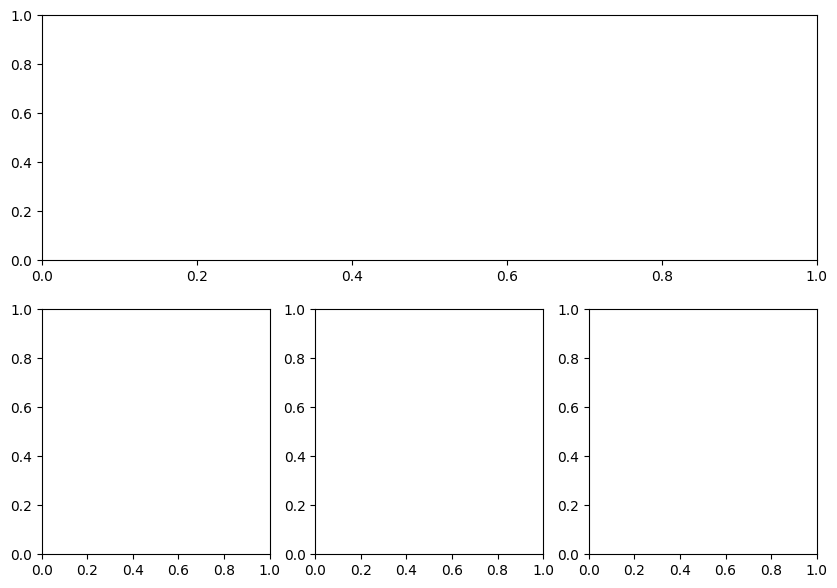

In [45]:
space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

In [50]:
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

Text(0.5, 1.0, 'Reachability Plot')

# OPTICS

In [53]:
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(-1, len(np.unique(clust.labels_)) - 1), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

Text(0.5, 1.0, 'Automatic Clustering\nOPTICS')

# DBSCAN at 0.5

In [52]:
colors = ["g.", "r.", "b.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

Text(0.5, 1.0, 'Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2

In [51]:
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>